Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We would like to rework background of X01.

# Previously
20200824/03 showed that we can cleanly extract X01 by introducing arbitrary adjustment +1 in y direction of the trace. By doing this, good aperture halfdy >= 2 pix, and when halfdy <= 4 pix C02 contamination is insignificant. However, we still had one issue left: background gradient. We will attempt this issue in this Notebook.

# Resources
- 20200821/04 served as a template, and was duplicated to be the bone of this file.

# Note
We include the trace adjustment by changing xyd_adjust.


In [7]:
from hstphot.read_ds9region import read_ds9region
from hstgrism.container import Container
from hstgrism.computexyref import ComputeXYREF
from hstgrism.wfc3irg102 import WFC3IRG102
from hstgrism.cutout2d import Cutout2D
from hstgrism.background import Background
from hstgrism.to_fullframe import to_fullframe
from hstgrism.show_overview import show_overview
from hstgrism.show_bbox import show_bbox
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import copy


In [8]:
gfile = ('/Users/kbhirombhakdi/_work/Sidekicks/20200821/drzblot_X01_201911_G102/idwbk3z1q_flt.fits',1)
dfile = ('/Users/kbhirombhakdi/_work/_data/15510/mastDownload/HST/idwbk3z0q/idwbk3z0q_flt.fits',1)
ds9file = '/Users/kbhirombhakdi/_work/_data/15510/mastDownload/HST/idwbk3z0q/idwbk3z0q.reg'
confile = '/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/G102.F105W.V4.32.conf'
flatfile = '/Users/kbhirombhakdi/_work/_calib_files/WFC3.IR.G102.cal.V4.32/WFC3.IR.G102.flat.2.fits'
beam = 'A'


In [9]:
sourcename = 'X01'
dateobs = '201911'
filterobs = 'G102'
identifier = '{0}_{1}_{2}_rebkg'.format(sourcename,dateobs,filterobs)
containerobj = Container(identifier,identifier,'pdf',False)


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder X01_201911_G102_rebkg already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)


In [10]:
xyd = read_ds9region(ds9file)[sourcename] - np.array([1.,0.])
xydiff = 'default'
xyoff = 'default'
container = containerobj
t = ComputeXYREF(xyd,xydiff,xyoff,confile,beam,gfile,dfile,container)
t.compute()
t.save()


Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_xyref.csv


In [11]:
xyref = pd.read_csv('./{0}/{0}_xyref.csv'.format(identifier)).xyref.values
xgbound=(25, 250)
container = containerobj
gobj = WFC3IRG102(confile,beam,xyref,xgbound,container)
gobj.compute()
gobj.save()


Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Rescale = False
Perform compute
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_trace.csv


Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_overview.pdf



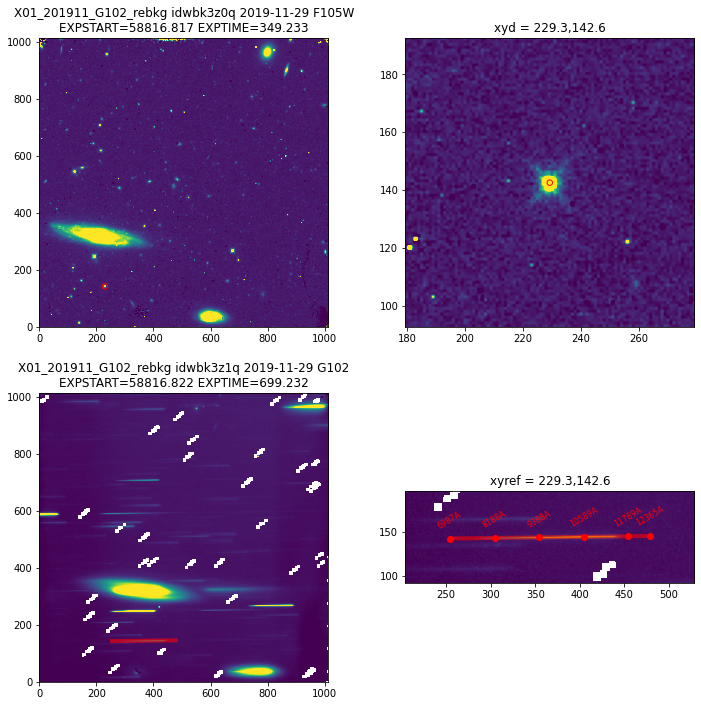

In [12]:
trace = pd.read_csv('./{0}/{0}_trace.csv'.format(identifier))
xh = trace.xh.values
yh = trace.yh.values
ww = trace.ww.values
objname = identifier
save = True
containter = containerobj
show_overview(gfile,dfile,xyd,xyref,xh,yh,ww,objname,save,container)


In [13]:
xg = xh + xyref[0]
yg = yh + xyref[1]
halfdy = 15
tbox={'xg': xg, 'yg': yg, 'halfdyup': halfdy, 'halfdylow': halfdy}
bbox={'padxleft': 5, 'padxright': 5, 'padyup': 5, 'padylow': 5}
image = fits.open(gfile[0])[gfile[1]].data
container = containerobj
cutobj = Cutout2D(tbox,bbox,image,container)
cutobj.compute()
cutobj.save()


Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_tbox.csv
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_bbox.csv
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_bbcorner.csv
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_cutout.fits
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_mask.fits


Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_bbox.pdf


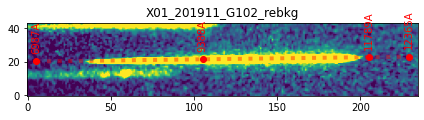

In [14]:
cutoutdata = fits.open('./{0}/{0}_cutout.fits'.format(identifier))[1].data
objname = identifier
# maskdata = fits.open('./{0}/{0}_mask.fits'.format(identifier))[1].data
maskdata = None
do_trace = True
bb0x = pd.read_csv('./{0}/{0}_bbcorner.csv'.format(identifier)).bb0x.values[0]
bb0y = pd.read_csv('./{0}/{0}_bbcorner.csv'.format(identifier)).bb0y.values[0]
xcut = xh + xyref[0] - bb0x
ycut = yh + xyref[1] - bb0y
ww = trace.ww.values
save = True
container = containerobj
show_bbox(cutoutdata=cutoutdata,objname=objname,maskdata=maskdata,
          do_trace=do_trace,xcut=xcut,ycut=ycut,ww=ww,save=save,container=container
         )


Rescale = True

Exclude 0 invalid data points
data_minmax = (0.0,234.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.0,43.0) : scale_minmax = (-1.0,1.0) : method = linear

Exclude 0 invalid data points
data_minmax = (0.5492091178894043,2.0501394271850586) : scale_minmax = (-1.0,1.0) : method = linear


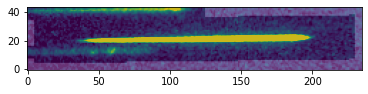

In [18]:
gdata = fits.open('./{0}/{0}_cutout.fits'.format(identifier))[1].data
mdata = fits.open('./{0}/{0}_mask.fits'.format(identifier))[1].data.astype(bool)
container = containerobj
bkgobj = Background(gdata=gdata,norder=0,mdata=mdata,container=container)
t = mdata.copy()
t[35:,0:125] = True
t[8:17,0:100] = True
bkgobj.poly2d.model['MASKFIT'] = t.copy()
plt.figure()
td = bkgobj.poly2d.data['Y']
m = np.isfinite(td)
vmin,vmax = np.percentile(td[m],5.),np.percentile(td[m],95.)
plt.imshow(td,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
plt.imshow(bkgobj.poly2d.model['MASKFIT'],origin='lower',cmap='Greys',alpha=0.2,vmin=0)


Rescale = False
Perform fit
Perform compute
Sigma clipping = False
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_cutbkg.fits
Save ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_maskfit.fits


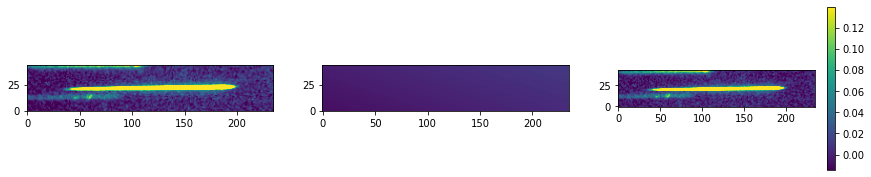

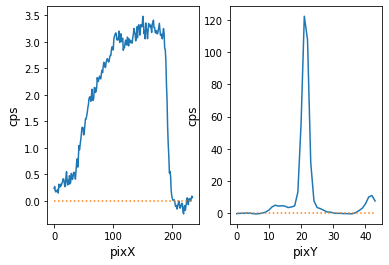

In [20]:
norder = 1
bkgobj.poly2d.model['NORDER'] = norder
bkgobj.poly2d.fit()
bkgobj.save()
##########
# show
##########
t = bkgobj.poly2d.data['Y']
m = np.isfinite(t)
vmin,vmax = np.percentile(t[m],5.),np.percentile(t[m],95.)
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
y = bkgobj.poly2d.data['Y']
yfit = bkgobj.poly2d.model['YFIT']
ysub = y - yfit
ax1.imshow(y,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax2.imshow(yfit,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
vmin,vmax = np.percentile(ysub,5.),np.percentile(ysub,95.)
im3 = ax3.imshow(ysub,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(im3)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(ysub.sum(axis=0)),ax1.set_xlabel('pixX',fontsize=12),ax1.set_ylabel('cps',fontsize=12)
ax1.plot(np.full_like(ysub.sum(axis=0),0.,dtype=float),':')
ax2.plot(ysub.sum(axis=1)),ax2.set_xlabel('pixY',fontsize=12),ax2.set_ylabel('cps',fontsize=12)
ax2.plot(np.full_like(ysub.sum(axis=1),0.,dtype=float),':')


In [21]:
##########
# to fullframe bkg
##########
cutdata = bkgobj.poly2d.model['YFIT']
fullfile = gfile
bbcorner = pd.read_csv('./{0}/{0}_bbcorner.csv'.format(identifier))
bb0x = bbcorner.bb0x.values[0]
bb1x = bbcorner.bb1x.values[0]
bb0y = bbcorner.bb0y.values[0]
bb1y = bbcorner.bb1y.values[0]
savesuffix = 'fullbkg'
container = containerobj
to_fullframe(cutdata,fullfile,bb0x,bb1x,bb0y,bb1y,savesuffix,container)


Make a copy of /Users/kbhirombhakdi/_work/Sidekicks/20200821/drzblot_X01_201911_G102/idwbk3z1q_flt.fits to ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_fullbkg.fits


In [22]:
##########
# to fullframe sub
##########
cutdata = bkgobj.poly2d.data['Y'] - bkgobj.poly2d.model['YFIT']
fullfile = gfile
bbcorner = pd.read_csv('./{0}/{0}_bbcorner.csv'.format(identifier))
bb0x = bbcorner.bb0x.values[0]
bb1x = bbcorner.bb1x.values[0]
bb0y = bbcorner.bb0y.values[0]
bb1y = bbcorner.bb1y.values[0]
savesuffix = 'fullsub'
container = containerobj
to_fullframe(cutdata,fullfile,bb0x,bb1x,bb0y,bb1y,savesuffix,container)


Make a copy of /Users/kbhirombhakdi/_work/Sidekicks/20200821/drzblot_X01_201911_G102/idwbk3z1q_flt.fits to ./X01_201911_G102_rebkg/X01_201911_G102_rebkg_fullsub.fits


Text(0.5, 1.0, 'resurrected')

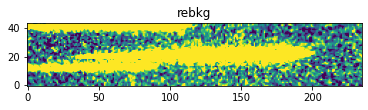

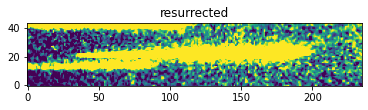

In [27]:
##### show #####
plt.figure()
m = np.isfinite(cutdata)
vmin,vmax = np.percentile(cutdata[m],5.),np.percentile(cutdata[m],70.)
plt.imshow(cutdata,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
plt.title('rebkg',fontsize=12)
plt.figure()
t = fits.open('/Users/kbhirombhakdi/_work/Sidekicks/20200821/X01_201911_G102_resurrected/X01_201911_G102_resurrected_fullsub.fits')[1].data
tt = pd.read_csv('/Users/kbhirombhakdi/_work/Sidekicks/20200821/X01_201911_G102_resurrected/X01_201911_G102_resurrected_bbcorner.csv')
t = t[tt.bb0y[0]:tt.bb1y[0],tt.bb0x[0]:tt.bb1x[0]]
plt.imshow(t,origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
plt.title('resurrected',fontsize=12)
    

# Summary
We fixed the background gradient problem. Outputs were recorded in 20200824/X01_201911_G102_rebkg/*. Also, note that trace already adjuested with +1 in y direction compared to *resurrected from 20200821.